In [88]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import spacy
from spacy.lang.en import English

import nlp
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation as PUNCTS
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
spacy.load('en_core_web_sm')
nlp = English()

[nltk_data] Downloading package stopwords to /home/gal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/gal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Guys, is there any way to shut up nltk lib?

In [89]:
# CONSTANTS
STOP_WORDS = set(stopwords.words("english")) - {'who', 'whom', 'what', 'when', 'where', 'why', 'how'}

In [90]:
df = pd.read_csv('train_dup.csv').drop(columns='id', axis=1)
df = df.dropna()
df.head()

,Unnamed: 0,qid1,qid2,question1,question2,is_duplicate,q1_all,q2_all,q1_ps,q2_ps
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,15,13,8,7
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,11,16,5,8
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,15,11,6,6
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,13,21,5,10
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,16,8,10,5


In [102]:
#unique sentences df
unique_set = pd.DataFrame(set(df.question1.append(df.question2).values),columns=['unique_sentence'])

In [103]:
def word_count_sentence(sentence):
""" The function takes a string, leave only words and ' ', split by ' ' and
   return len of word_array"""

    sentence = re.sub("[^A-Za-z]", " ", sentence)
    sentence = sentence.split()
    return len(sentence)

In [104]:
#adding column with len of sentence in words
unique_set['sentence_len_word'] = unique_set.stack(). \
apply(lambda x: word_count_sentence(x)).reset_index(drop=True) 

In [108]:
#adding column with len of sentence in chars

unique_set['sentence_len_char'] = unique_set.unique_sentence. \
apply(lambda x: len(x)).reset_index(drop=True) 

In [ ]:
Here we can see the top20 longest sentences

In [124]:

df_u_s = unique_set.sort_values('sentence_len_word', ascending=False).head(20)

The plot is not sucsessful, but i will leave it here: it suppose to be a horisontal barplot with top max count

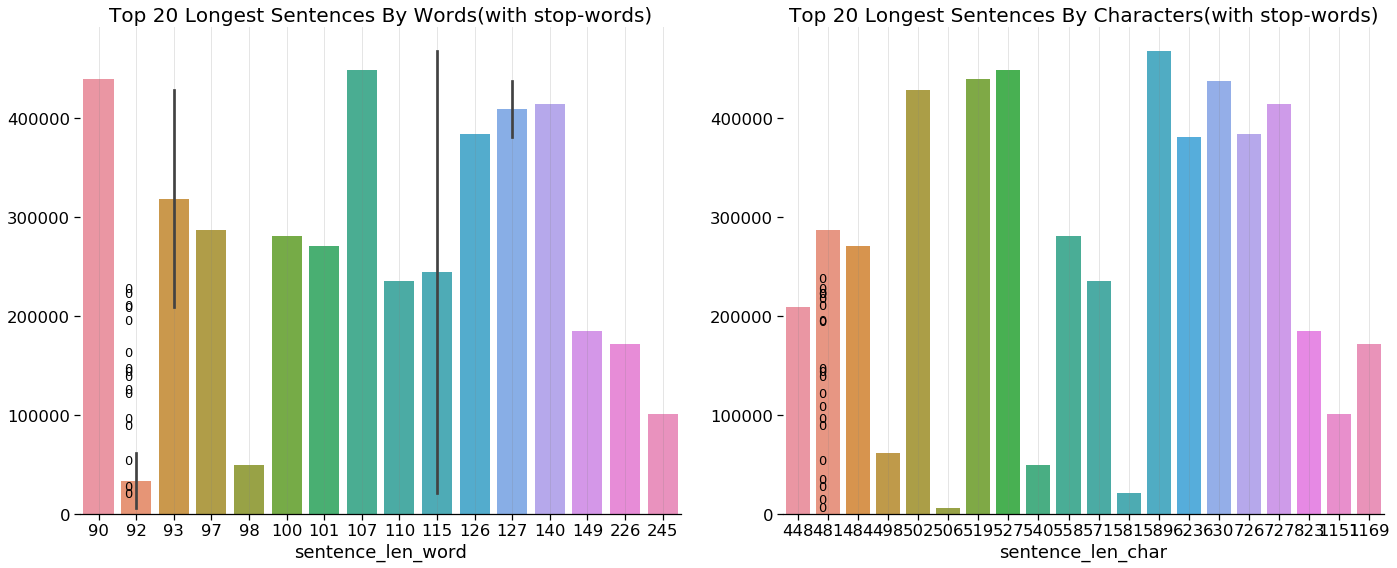

In [137]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
#sentence_len_word
gr = sns.barplot(x=df_u_s.sentence_len_word,y=df_u_s.unique_sentence.index, ax=ax1)
gr.set_title('Top 20 Longest Sentences By Words(with stop-words)', fontsize = 20)
for p in gr.patches:
    width = p.get_width()
    gr.text(width   ,
            p.get_y()+p.get_height()/2+0.2 ,
            f'{int(width)}',
            ha="center", size=13)
ax1.grid(axis='x',which='major',color='grey', alpha=0.2)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)

#sentence_len_char
g = sns.barplot(df_u_s.sentence_len_char,y=df_u_s.unique_sentence.index, ax=ax2)
g.set_title('Top 20 Longest Sentences By Characters(with stop-words)', fontsize = 20);

for p in g.patches:
    width = p.get_width()
    g.text(width   ,
            p.get_y()+ p.get_height()/2+0.2 ,
            f'{int(width)}',
            ha="center", size=13)
ax2.grid(axis='x',which='major',color='grey', alpha=0.2)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
plt.tight_layout()